## Veri seti bilgi

Veri kümesi, pizza satışlarıyla ilgili bilgileri içermektedir. Bu bilgiler arasında pizza kimliği, sipariş kimliği, pizza adı kimliği, miktar, sipariş tarihi, sipariş saati, birim fiyat, toplam fiyat, pizza boyutu, pizza kategorisi, pizza malzemeleri ve pizza adı yer almaktadır. Her sütun, pizza satış verileriyle ilgili belirli bir özelliği temsil etmektedir. Veri kümesi, pizza ve müşteri işlemleriyle ilgili 48.621 siparişi kapsamaktadır. Bu pizza satış veri kümesi, 12 ilgili özelliği barındırmaktadır.

* pizza_id: Veri kümesindeki her pizza için benzersiz bir tanımlayıcı.
* order_id: Her pizza siparişi için benzersiz bir tanımlayıcı.
* pizza_name_id: Her spesifik pizza adına ait tanımlayıcı.
* quantity: Her işlemde sipariş edilen pizza sayısı.
* order_date: Pizza siparişinin verildiği tarih.
* order_time: Pizza siparişinin verildiği saat.
* unit_price: Bir adet pizzanın fiyatı.
* total_price: Pizza siparişinin toplam fiyatı (birim fiyat ile miktarın çarpımı).
* pizza_size: Pizzanın boyutu veya ölçüleri (S, M, L, XL, XXL).
* pizza_category: Pizzanın türünü veya stilini belirten kategori veya sınıflandırma (Klasik, Vejetaryen, Süper, Tavuklu).
* pizza_ingredients: Pizzanın hazırlanmasında kullanılan malzemelerin listesi.
* pizza_name: Her spesifik pizzaya atanan ad veya etiket.

# Kütüphanelerin yüklenmesi

In [1]:
#data processing
import pandas as pd 
import numpy as np
import random
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx


# Veri okuma ve genel bakış

In [2]:
data = pd.read_excel('/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [4]:
data.sample(4)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
8808,8809,3863,pepperoni_l,1,2015-03-06,19:50:37,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
16516,16517,7272,pep_msh_pep_m,1,2015-05-02,17:03:08,14.50,14.50,M,Classic,"Pepperoni, Mushrooms, Green Peppers","The Pepperoni, Mushroom, and Peppers Pizza"
48566,48567,21326,ital_veggie_m,1,2015-12-31,18:38:38,16.75,16.75,M,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza
40467,40468,17825,cali_ckn_m,1,2015-10-31,15:26:05,16.75,16.75,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza


In [5]:
data.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

##### Burada verisetinde hiç eksik olmadığını anlıyoruz.Eksik veri elde etmek için aşağıdaki fonksiyonu kullanalım.

In [6]:
data=pd.DataFrame(data)

In [7]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [8]:
#data = df_with_missing


###### tekrar çalıştılırdığı için hata veriyor.

In [9]:
# Fonksiyonu çağır ve %10 eksik veri ekle
data = add_random_missing_values(data, missing_rate=0.1)


##### Şimdi tekrar eksik verileri kontrol edelim.

In [10]:
data.isnull().sum()

order_details_id     4694
order_id             4626
pizza_id             4721
quantity             4717
order_date           4596
order_time           4640
unit_price           4758
total_price          4646
pizza_size           4571
pizza_category       4499
pizza_ingredients    4436
pizza_name           4670
dtype: int64

In [11]:
data.dropna()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
5,6.0,2.0,thai_ckn_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
9,10.0,5.0,ital_supr_m,1.0,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
11,12.0,6.0,the_greek_s,1.0,2015-01-01,12:29:36,12.00,12.00,S,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
19,20.0,9.0,mexicana_s,1.0,2015-01-01,12:52:01,12.00,12.00,S,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48610,48611.0,21346.0,soppressata_l,1.0,2015-12-31,20:51:07,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
48614,48615.0,21347.0,southw_ckn_l,1.0,2015-12-31,21:14:37,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
48617,48618.0,21348.0,napolitana_s,1.0,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [12]:
data.shape

(48620, 12)

In [13]:
data.columns
#sütun etiketlerini gösterir.

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [14]:
#tekrarlayan satır olup olmadığını kontrol edelim.
data.duplicated().sum()

0

# Veri Analizi ve Görselleştirme

#### Keşifsel Analizde Yardımcı Olacak Sorular
##### Haftalık Analiz
- Haftanın hangi günlerinde en fazla sipariş verilmiştir?
- En fazla siparişin verildiği zaman dilimi nedir?
##### Pizza Analizi
- En düşük fiyatlı ve en yüksek fiyatlı pizza hangileridir?
- En çok satılan pizzalar hangisi?
- Kategori başına kaç farklı pizza vardır?
- Boyut başına kaç farklı pizza vardır?
- Birden fazla kategoriye ait pizzalar hangileridir?

#### Haftanın hangi günlerinde en fazla sipariş verilmiştir

In [15]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
data['day_of_week'] = data['order_date'].dt.day_name()

orders_by_day = data['day_of_week'].value_counts().reset_index()
orders_by_day.columns = ['Day of Week', 'Number of Orders']

print(orders_by_day)

  Day of Week  Number of Orders
0      Friday              7340
1    Saturday              6667
2    Thursday              6662
3   Wednesday              6135
4     Tuesday              6110
5      Monday              5764
6      Sunday              5346


##### Günlük pizza satışlarını veren plot grafiği

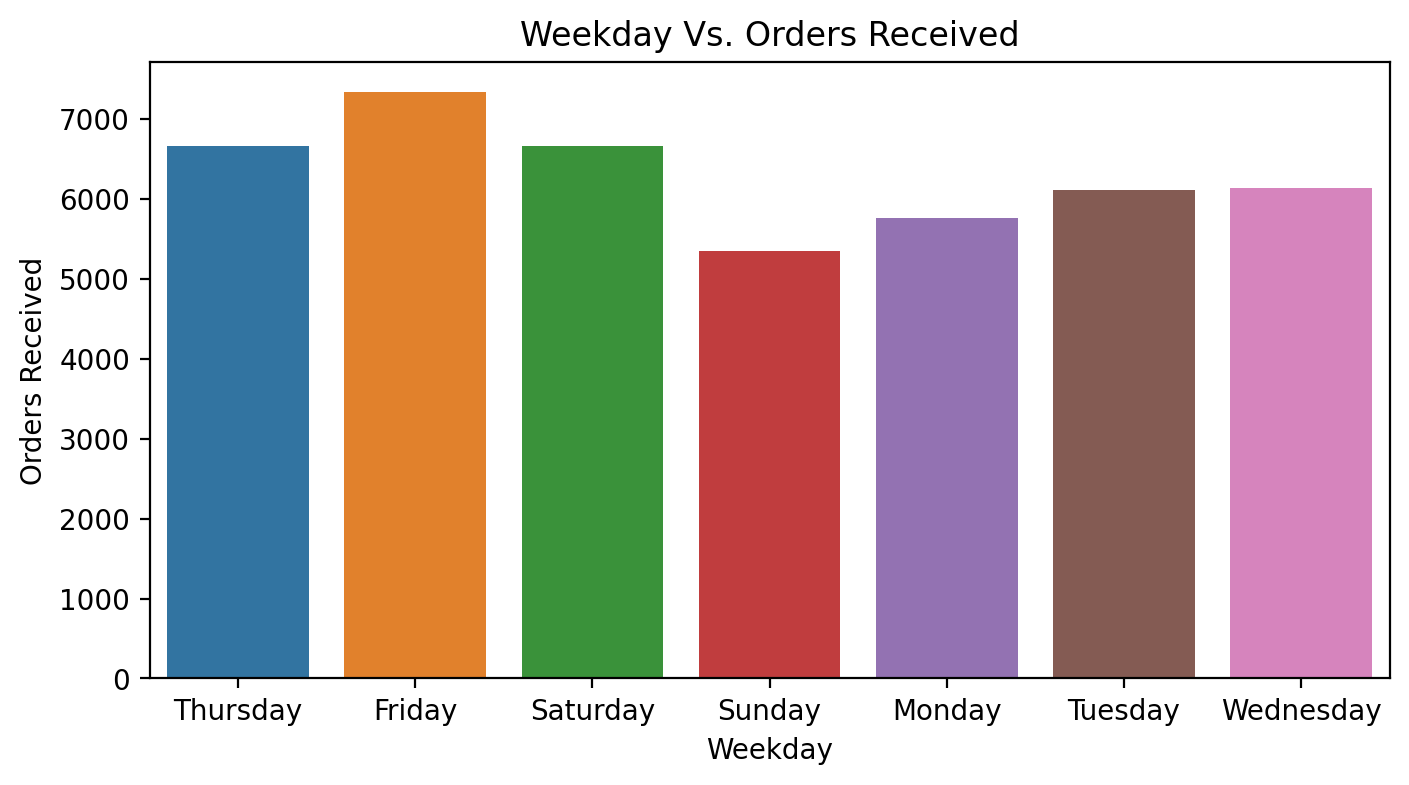

In [16]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=data, x='day_of_week')
plt.xlabel("Weekday")
plt.ylabel("Orders Received")
plt.title("Weekday Vs. Orders Received")
plt.show();

##### Toplam 6662 sipariş ile haftanın en yoğun günü Cuma'dır. Bu durum, insanların hafta sonu yaklaştığında pizza yemeye daha fazla eğilimli olabileceğini gösteriyor. Cuma günleri genellikle sosyal etkinlikler, arkadaş buluşmaları veya hafta sonu başlangıcı gibi durumlar pizza satışlarını artırabilir.
##### Hafta ortası satışlar  genelde aynı düzeylerdedir.

#### Hangi saatlerde en çok sipariş alınıyor?

In [17]:
data['order_time'] = pd.to_datetime(data['order_time'], errors='coerce').dt.hour
orders_by_hour = data['order_time'].value_counts().sort_index().reset_index()
orders_by_hour.columns = ['Hour', 'Number of Orders']

print(orders_by_hour)

Empty DataFrame
Columns: [Hour, Number of Orders]
Index: []


##### Yukardaki çıktıya göre order_time sütununda eksik (NaN) veya geçersiz formatta (örneğin, saat yerine metin) veriler olabilir.O yüzden order_time sütunlarını kontrol edelim.

In [18]:
print(data['order_time'].head(10))  # İlk 10 değeri kontrol et
print(data['order_time'].isnull().sum())  # Eksik değer sayısını kontrol et

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: order_time, dtype: float64
48620


##### Saat bilgilerinin tümü etsik olduğu için random değerler ile dolduralım.

In [19]:
data['order_time'] = data['order_date'].apply(
lambda x: pd.Timestamp(x) + pd.to_timedelta(random.randint(0, 23), unit='h')
)

##### order_time verilerinin dolup dolmadığını kontrol  edelim.

In [20]:
data['order_time'].head(10)

0   2015-01-01 19:00:00
1   2015-01-01 03:00:00
2   2015-01-01 04:00:00
3   2015-01-01 11:00:00
4   2015-01-01 19:00:00
5   2015-01-01 13:00:00
6   2015-01-01 21:00:00
7   2015-01-01 04:00:00
8                   NaT
9   2015-01-01 15:00:00
Name: order_time, dtype: datetime64[ns]

##### order_time verilereini rastgele doldurduk şimdi hangi saatlerde en çok sipariş alınmış tekrardan bakabiliriz.

In [21]:
data['order_time'] = pd.to_datetime(data['order_time'], errors='coerce').dt.hour
orders_by_hour = data['order_time'].value_counts().sort_index().reset_index()
orders_by_hour.columns = ['Hour', 'Number of Orders']

print(orders_by_hour)

    Hour  Number of Orders
0    0.0              1759
1    1.0              1762
2    2.0              1881
3    3.0              1768
4    4.0              1912
5    5.0              1840
6    6.0              1821
7    7.0              1801
8    8.0              1815
9    9.0              1841
10  10.0              1848
11  11.0              1796
12  12.0              1916
13  13.0              1816
14  14.0              1839
15  15.0              1821
16  16.0              1881
17  17.0              1839
18  18.0              1861
19  19.0              1787
20  20.0              1810
21  21.0              1889
22  22.0              1909
23  23.0              1812


#### En düşük fiyatlı ve en yüksek fiyatlı pizza hangileridir?

In [22]:
# en pahalı pizza
max_price = data["unit_price"].max()
data.loc[data["unit_price"] == max_price].pizza_id.unique()

array(['the_greek_xxl', nan], dtype=object)

In [23]:
# en ucuz pizza
min_price = data.unit_price.idxmin()
data.loc[min_price].pizza_id

'pepperoni_s'

#### En çok satılan pizza hangisidir?

In [24]:
# En çok satılan pizzalar 
most_sold = data.groupby("pizza_id")["quantity"].sum().sort_values(ascending = False).reset_index(name = "most_sold").head(10)
most_sold

,pizza_id,most_sold
0,big_meat_s,1587.0
1,thai_ckn_l,1151.0
2,five_cheese_l,1134.0
3,four_cheese_l,1073.0
4,classic_dlx_m,970.0
5,spicy_ital_l,893.0
6,southw_ckn_l,829.0
7,hawaiian_s,827.0
8,bbq_ckn_l,814.0
9,bbq_ckn_m,790.0


##### En çok satılan pizzaları daha hızlı ve görsel olarak görmek için grafik oluşturalım. 

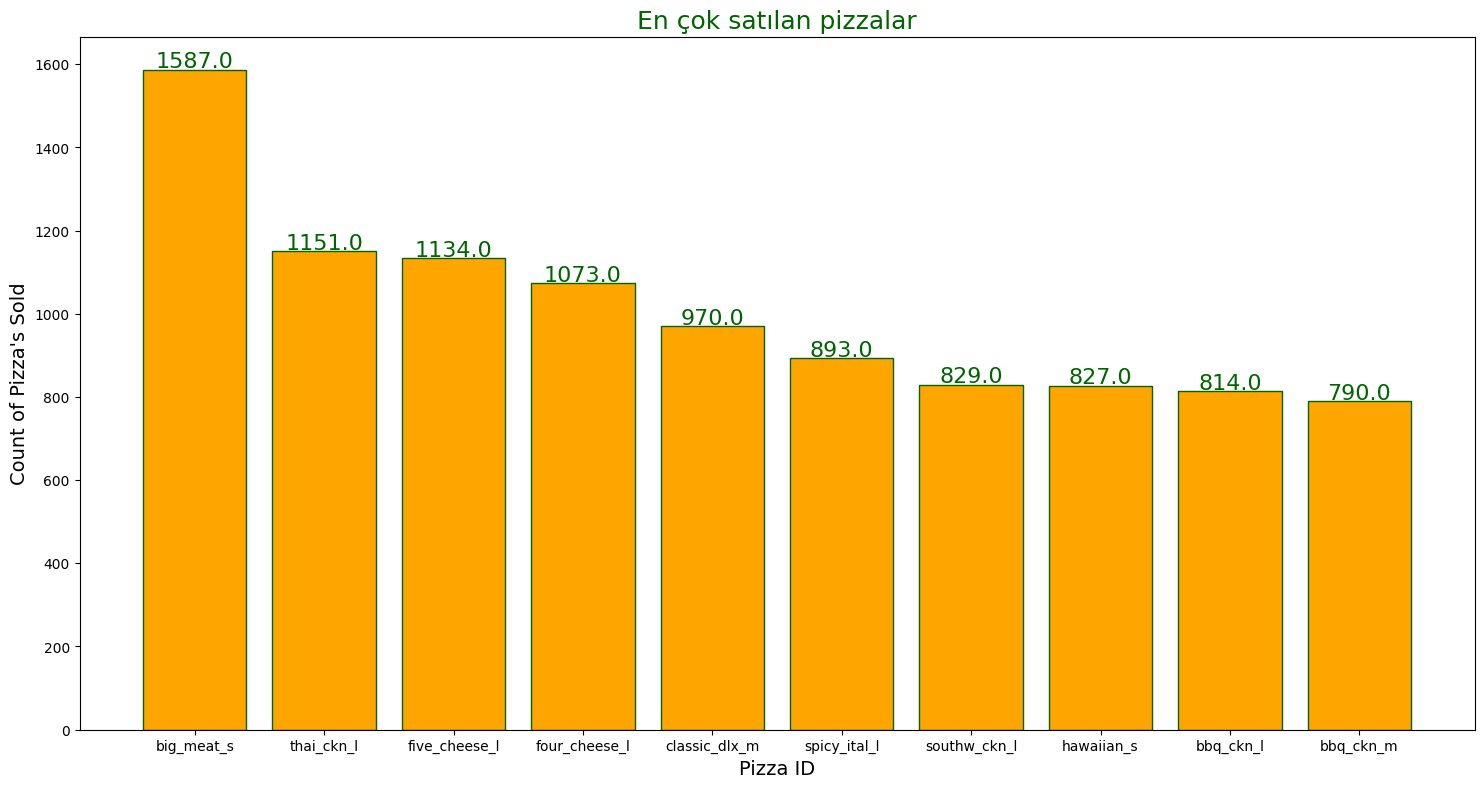

In [25]:
# Bar Grafiği Oluşturma
plt.figure(figsize=(18, 9))
plt.bar(most_sold['pizza_id'], most_sold['most_sold'], color='orange', edgecolor='darkgreen')

# Grafik Başlık ve Etiketleri
plt.title("En çok satılan pizzalar", fontsize=18, color="darkgreen")
plt.xlabel("Pizza ID", fontsize=14)
plt.ylabel("Count of Pizza's Sold", fontsize=14)

# Her Çubuğun Üstüne Değerleri Ekleme
for index, value in enumerate(most_sold['most_sold']):
    plt.text(index, value + 5, str(value), ha='center', fontsize=16,color="darkgreen")

# Gösterim
plt.show()

#### Kategori başına kaç farklı pizza vardır?

In [26]:

pizzas_per_category = data['pizza_category'].value_counts()
print("Kategori Başına Pizza Sayısı:\n", pizzas_per_category)

Kategori Başına Pizza Sayısı:
 pizza_category
Classic    13266
Supreme    10691
Veggie     10354
Chicken     9810
Name: count, dtype: int64


##### Kategoriye göre pizza dağılımını veren pie grafiği

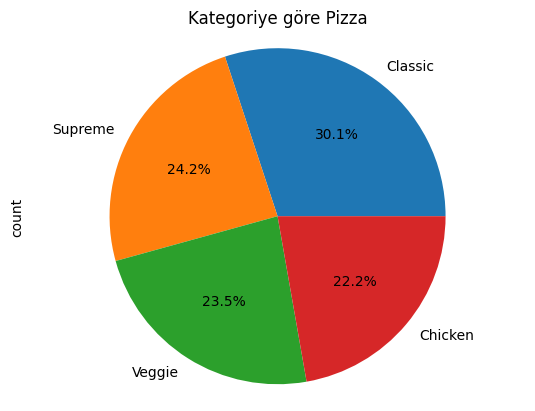

In [27]:
pizzas_per_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Kategoriye göre Pizza')
plt.axis('equal')
plt.show()

#### Boyut başına kaç farklı pizza vardır?

In [28]:
pizzas_per_size = data['pizza_size'].value_counts()
print("Boyut Başına Pizza Sayısı:\n", pizzas_per_size)

Boyut Başına Pizza Sayısı:
 pizza_size
L      16826
M      13900
S      12804
XL       494
XXL       25
Name: count, dtype: int64


##### Boyut başına pizza sayısını veren pie grafiği

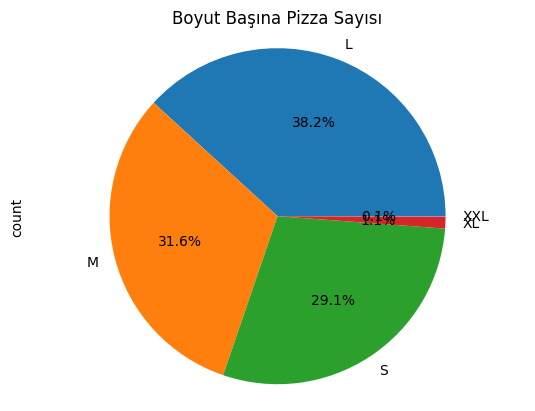

In [29]:
# pizza per size
pizzas_per_size.plot(kind='pie', autopct='%1.1f%%')
plt.title('Boyut Başına Pizza Sayısı')
plt.axis('equal')
plt.show()

#### Birden fazla kategoriye ait pizzalar hangileridir?

In [30]:
pizzas_with_multiple_categories = data.groupby('pizza_name').filter(lambda x: x['pizza_category'].nunique() > 1)
print("Birden Fazla Kategorili Pizzalar:\n", pizzas_with_multiple_categories)

Birden Fazla Kategorili Pizzalar:
 Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, day_of_week]
Index: []


##### Birden fazla kategoriye sahip pizza yoktur.

# Çözüm

- Fiyata Göre Pizza
|Kategori|En Pahalı|En Ucuz|
|---|---|---|
|PİZZA |The Pepperoni Pizza|The Greek Pizza|

- Büyüklük ve Kategoriye Göre Pizza
|Kategori|EN ÇOK TERCİH EDİLEN|EN AZ TERCİH EDİLEN|
|---|---|---|
|PİZZA BOYUTU|LARGE(L)|XXL|
|PİZZA KATEGORİ|SUPREME|CHİCKEN|

- Günlerde pazartesiden çarşambaya benzer bir sonuç görüyoruz, Perşembe yükseliyor, Cumazirve yapıyor, Cumartesi perşembeye benziyor ve pazar  en sakin gün olarak yorumlayabilir.

- Müşteriler genellikle large boy pizzaları tercih etmektedir.Toplamın sadece% 1,12'sini temsil eden XXL boyutu dışında hepsinin dengeli bir dağılımı vardır.Maliyetleri düşürmek için bir süreç standardizasyonunda düşünmek, restoranın XXL boyutunun kesilmesini analiz etmesi ilginç olabil


- Küçük boy Big Meat pizza, en çok satan ürün olduğundan, boyut ve fiyatın popülerlik üzerinde etkili olabileceği düşünülebilir. Ancak, bu hipotezi çürüten bir durum olarak, ikinci sırada Büyük boy Thai Chicken pizza yer alıyor. Bu durum, lezzet, baharatlama veya popülerliği etkileyen başka bilinmeyen faktörlerin de devrede olabileceğini göstermektedir. 

- Saat ile verileri rastgele doldurduğumuz için onlara göre yorum yapmak doğru olmaz.